# Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns



# Setting up the dataset

In [3]:
file_path = 'C:/Academics/Project/USL/Last.FM/Last.fm_data.csv'
data = pd.read_csv(file_path)

data.head()


,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


# EDA

In [4]:
# Combine selected text columns into one column for vectorization.
data['combined'] = data['Username'] + " " + data['Artist'] + " " + data['Track'] + " " + data['Album']

# Display the new combined column
print(data[['combined']].head())


                                            combined
0  Babs_05 Isobel Campbell The Circus Is Leaving ...
1  Babs_05 Isobel Campbell Dusty Wreath Ballad of...
2  Babs_05 Isobel Campbell Honey Child What Can I...
3  Babs_05 Isobel Campbell It's Hard To Kill A Ba...
4  Babs_05 Isobel Campbell Saturday's Gone Ballad...


In [5]:
# Handle missing values in the 'combined' column
data['combined'] = data['combined'].fillna('')



# Feature Extraction using TF-IDF

In [6]:
# Define the vectorizer
vectorizer = TfidfVectorizer()

In [7]:
# Transform the combined text into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(data['combined'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (166153, 58187)


# Dimensionality Reduction

As the Dataset is too big, my system was unable to run tSNE so had to scale down to 10k rows only

In [8]:
# Sample 10k rows for faster execution
df_sample = data.sample(n=10000, random_state=42)
tfidf_sample = vectorizer.fit_transform(df_sample['combined'])
tfidf_dense_sample = tfidf_sample.toarray()

In [9]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results_sample = tsne.fit_transform(tfidf_dense_sample)
print("t-SNE result shape (sample):", tsne_results_sample.shape)


t-SNE result shape (sample): (10000, 2)


# Visualization

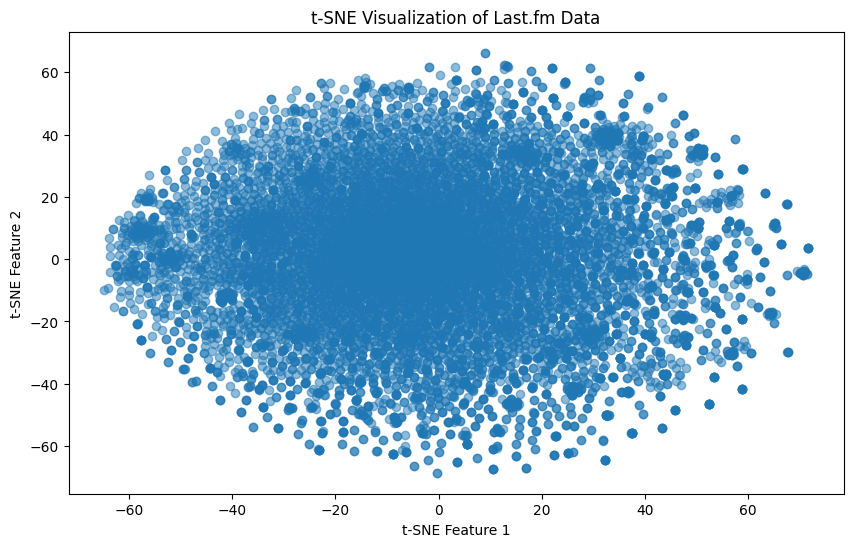

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results_sample[:, 0], tsne_results_sample[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Last.fm Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
